<a href="https://colab.research.google.com/github/mahananda123/Data_Processing_and_Manipulation/blob/main/Data_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Scaling
1. Min-Max Scaling
2. Z-score Standardization
3. Decimal Scaling

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [5]:
df['population'].describe()

count    17000.000000
mean      1429.573941
std       1147.852959
min          3.000000
25%        790.000000
50%       1167.000000
75%       1721.000000
max      35682.000000
Name: population, dtype: float64

###Min-Max Scaling


In [6]:
df['population_MinMax']=(df['population']-df['population'].min())/(df['population'].max()-df['population'].min())
df['population_MinMax']

0        0.028364
1        0.031559
2        0.009249
3        0.014350
4        0.017405
           ...   
16995    0.025337
16996    0.033381
16997    0.034782
16998    0.036296
16999    0.022506
Name: population_MinMax, Length: 17000, dtype: float64

In [7]:
df['population_MinMax'].describe()

count    17000.000000
mean         0.039984
std          0.032172
min          0.000000
25%          0.022058
50%          0.032624
75%          0.048152
max          1.000000
Name: population_MinMax, dtype: float64

###Z-score Normalization/standardization

In [9]:
df['population_Z']=(df['population']-df['population'].mean())/(df['population'].std())
df['population_Z']

0       -0.361173
1       -0.261858
2       -0.955326
3       -0.796769
4       -0.701809
           ...   
16995   -0.455262
16996   -0.205230
16997   -0.161670
16998   -0.114626
16999   -0.543252
Name: population_Z, Length: 17000, dtype: float64

In [10]:
df['population_Z'].describe()

count    1.700000e+04
mean     6.687461e-17
std      1.000000e+00
min     -1.242819e+00
25%     -5.571915e-01
50%     -2.287522e-01
75%      2.538880e-01
max      2.984043e+01
Name: population_Z, dtype: float64

###Decimal Scaling

In [11]:
df['population'].max()

35682.0

In [12]:
df['population_decimal']=df['population']/100000
df['population_decimal']

0        0.01015
1        0.01129
2        0.00333
3        0.00515
4        0.00624
          ...   
16995    0.00907
16996    0.01194
16997    0.01244
16998    0.01298
16999    0.00806
Name: population_decimal, Length: 17000, dtype: float64

In [13]:
df['population_decimal'].describe()

count    17000.000000
mean         0.014296
std          0.011479
min          0.000030
25%          0.007900
50%          0.011670
75%          0.017210
max          0.356820
Name: population_decimal, dtype: float64

In [16]:
df[['population','population_MinMax','population_Z', 'population_decimal']].describe()

,population,population_MinMax,population_Z,population_decimal
count,17000.000000,17000.000000,1.700000e+04,17000.000000
mean,1429.573941,0.039984,6.687461e-17,0.014296
std,1147.852959,0.032172,1.000000e+00,0.011479
min,3.000000,0.000000,-1.242819e+00,0.000030
25%,790.000000,0.022058,-5.571915e-01,0.007900
50%,1167.000000,0.032624,-2.287522e-01,0.011670
75%,1721.000000,0.048152,2.538880e-01,0.017210
max,35682.000000,1.000000,2.984043e+01,0.356820


In [14]:
import seaborn as sns

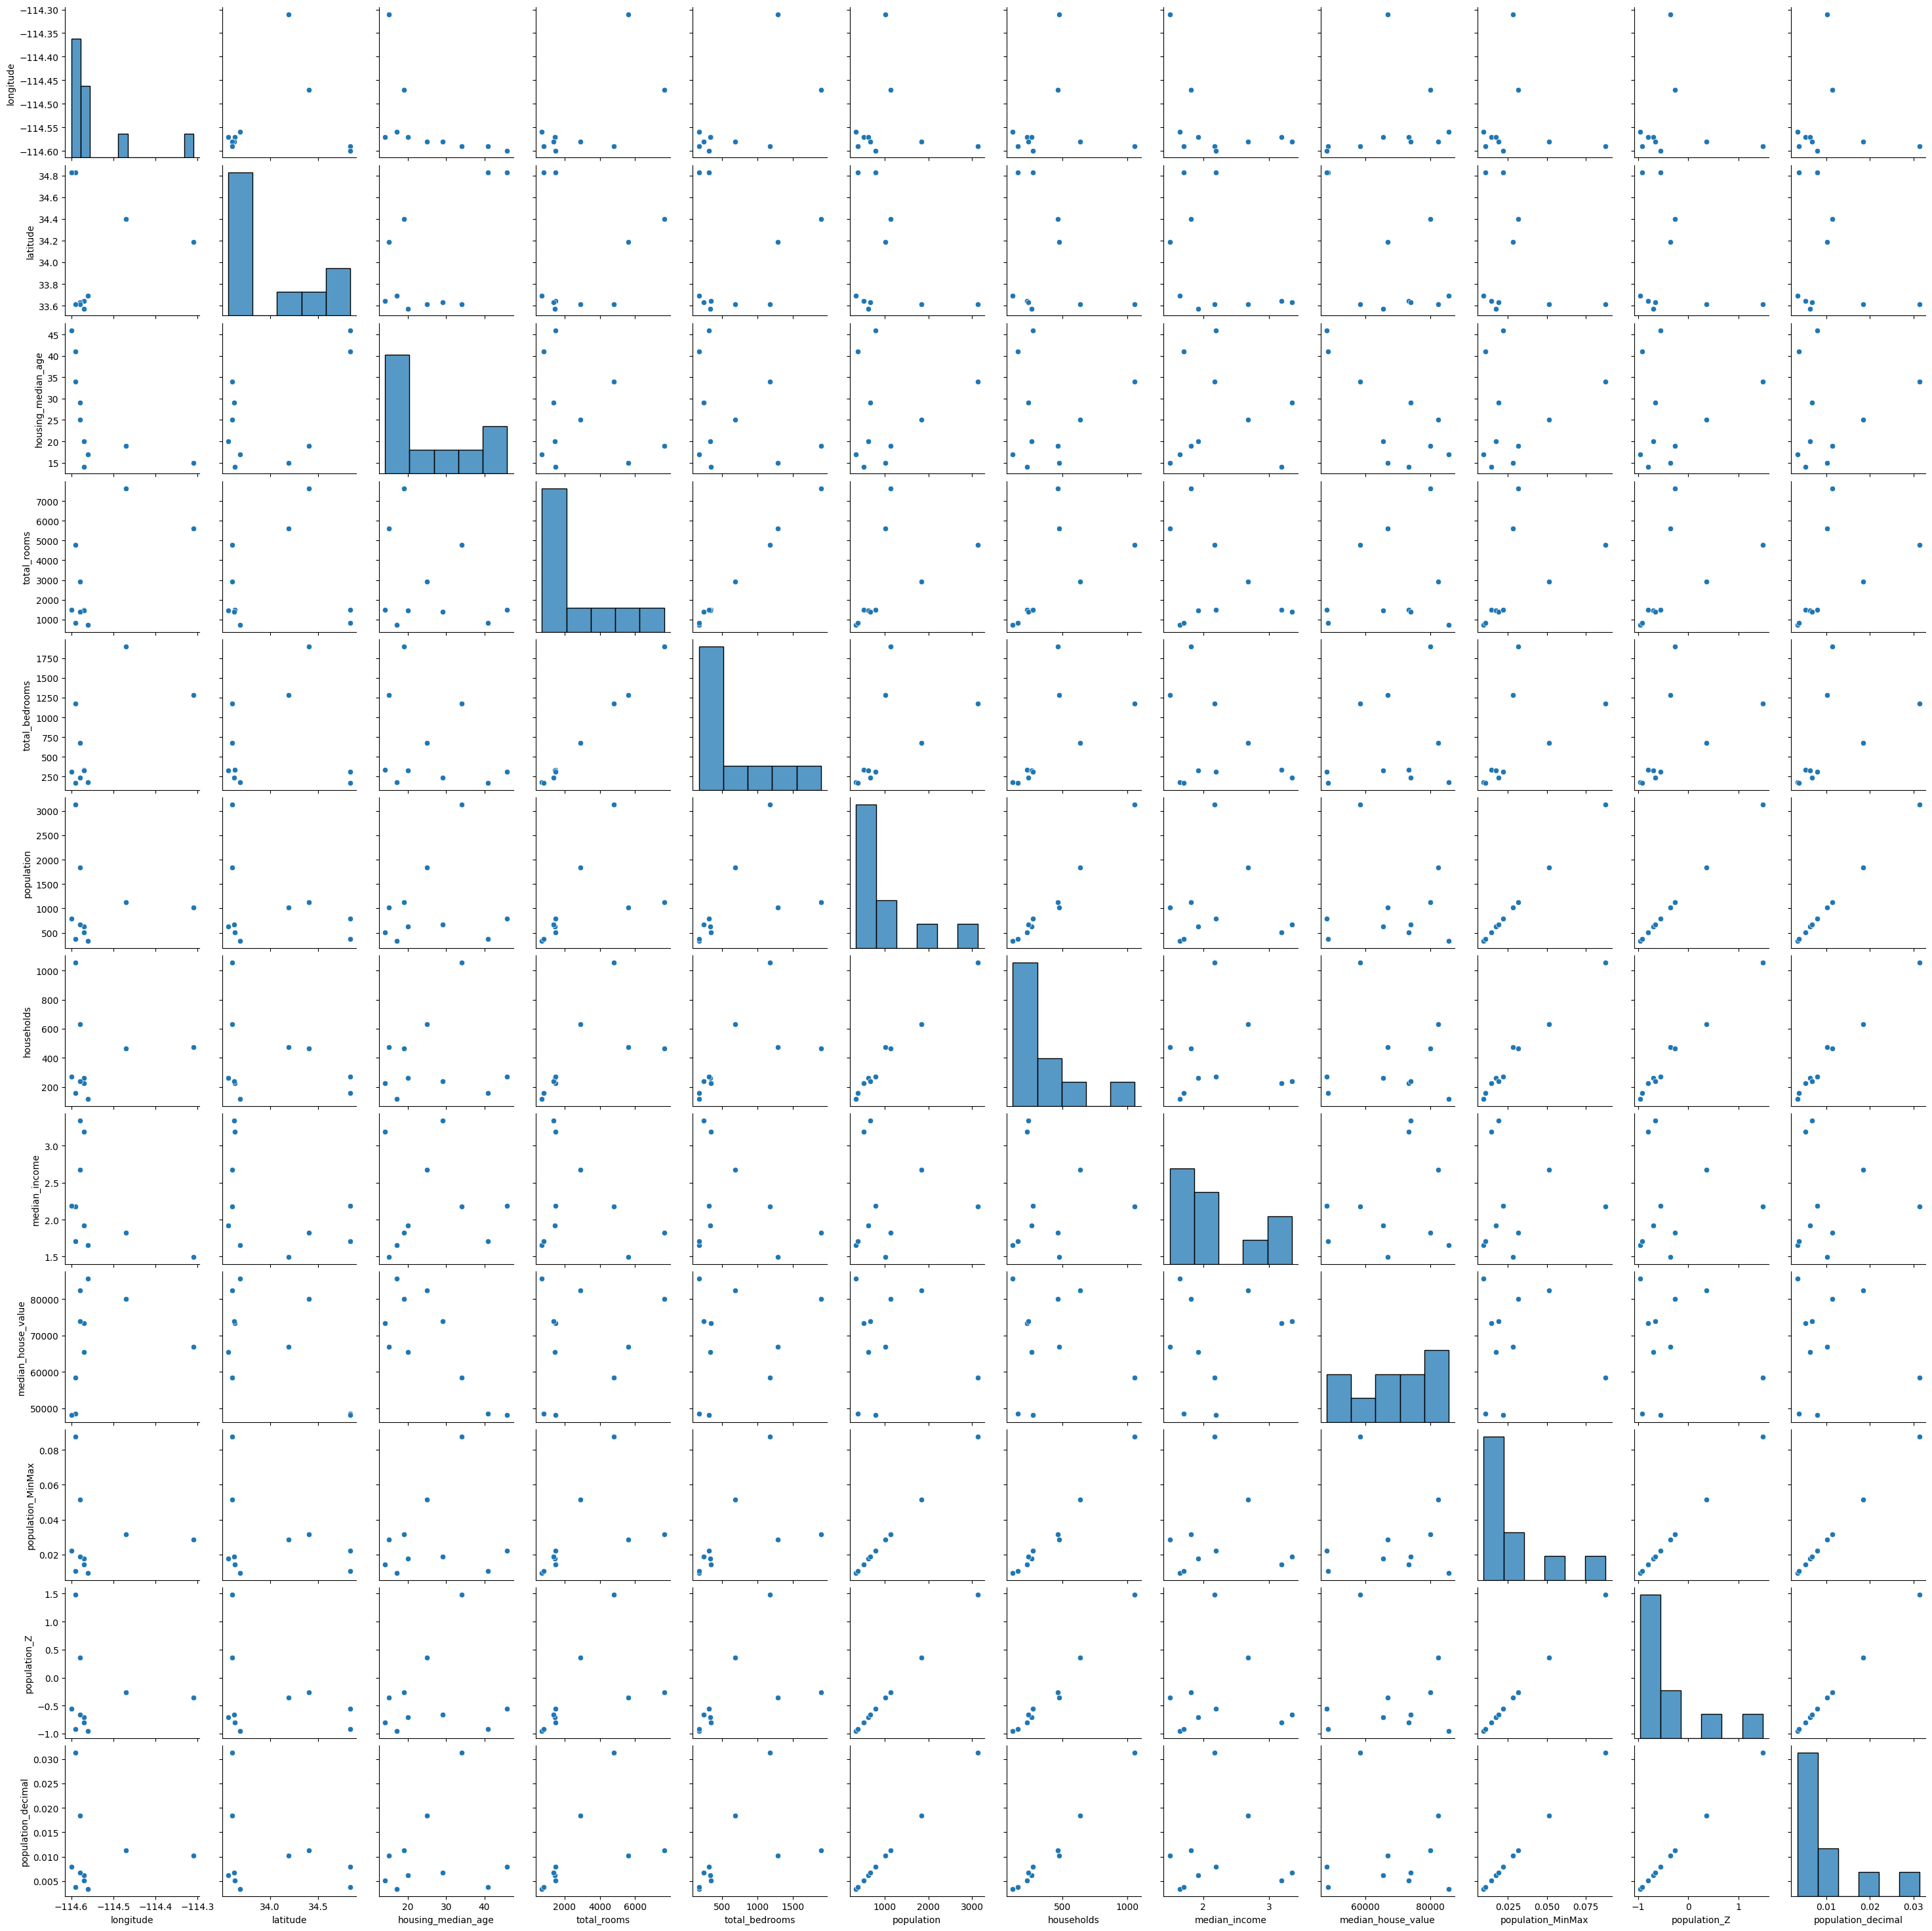

In [15]:
sns.pairplot(data=df[:10])